# Q.2 Analysis of csv file

In [18]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

In [19]:
data = pd.read_csv("F:\creditcard.csv")

In [20]:
data.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [21]:
# Shape of data
print(data.shape)

(284807, 31)


In [22]:
# Determine number of fraud cases in dataset 
fraud = data[data['Class'] == 1] 
valid = data[data['Class'] == 0] 
outlierFraction = len(fraud)/float(len(valid)) 
print("Outlier Fraction =",outlierFraction) 
print('Fraud Cases: {}'.format(len(data[data['Class'] == 1]))) 
print('Valid Transactions: {}'.format(len(data[data['Class'] == 0])))

Outlier Fraction = 0.0017304750013189597
Fraud Cases: 492
Valid Transactions: 284315


In [23]:
print("Amount details of the fraudulent transaction") 
fraud.Amount.describe() 

Amount details of the fraudulent transaction


count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [24]:
print("details of valid transaction") 
valid.Amount.describe() 

details of valid transaction


count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

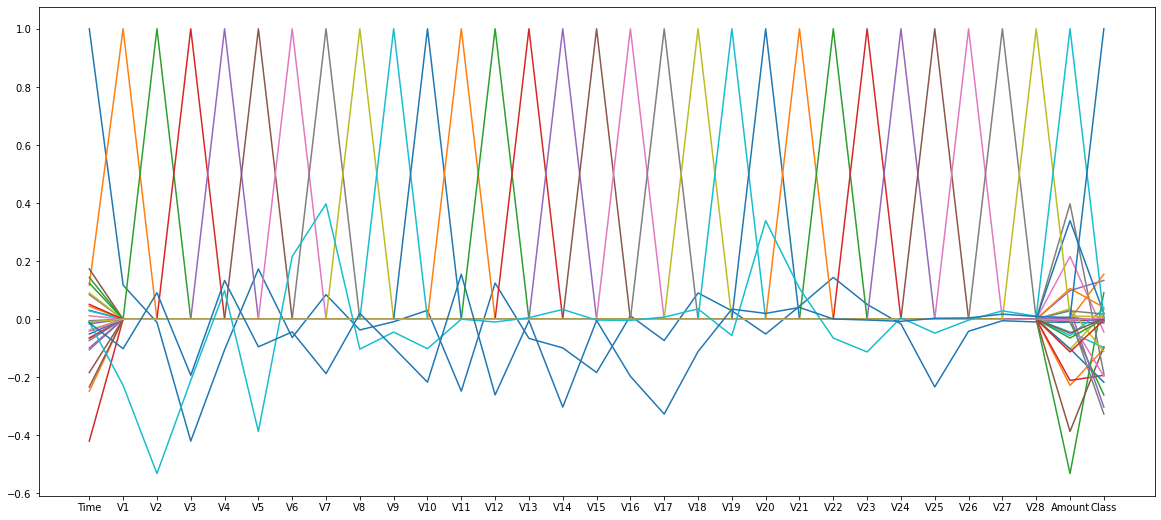

In [25]:
# Correlation matrix 
corrmat = data.corr() 
fig = plt.figure(figsize = (20, 9)) 
#sns.heatmap(corrmat, vmax = .8, square = True) 
plt.plot(corrmat, label = True)
plt.show()
# It can be seen from the data, the data is very unbalanced.
# As there is only 0.17% of fraudulent data in transaction,
# Thus, it becomes very difficult to tell whether the transaction
# is valid or fraud

In [26]:
# dividing the X and the Y from the dataset 
X = data.drop(['Class'], axis = 1) 
Y = data["Class"] 
print(X.shape) 
print(Y.shape) 
xData = X.values 
yData = Y.values

(284807, 30)
(284807,)


In [27]:
# Using Skicit-learn to split data into training and testing sets 
from sklearn.model_selection import train_test_split 
# Split the data into training and testing sets 
xTrain, xTest, yTrain, yTest = train_test_split( 
        xData, yData, test_size = 0.2, random_state = 42)

In [28]:
# Building the MLP classifier 
from sklearn.neural_network import MLPClassifier
# model creation 
mlp = MLPClassifier(max_iter=500, activation='relu') 
history = mlp.fit(xTrain, yTrain) 


In [31]:
# predictions 
yPred = mlp.predict(xTest) 
acc = mlp.score(xTest,yTest)
print(yPred)
print("The Testing accuracy:",acc)

[0 0 0 ... 0 0 0]
The Testing accuracy: 0.9983146659176293


In [32]:
# Evaluating the classifier 
# printing every score of the classifier 
from sklearn.metrics import classification_report, accuracy_score  
from sklearn.metrics import precision_score, recall_score 
from sklearn.metrics import f1_score, matthews_corrcoef 
from sklearn.metrics import confusion_matrix 

In [33]:
n_outliers = len(fraud) 
n_errors = (yPred != yTest).sum() 
print("The model used is Multi-Layer Perceptron classifier")

confusion_matrix(yTest,yPred)
  


The model used is Multi-Layer Perceptron classifier


array([[56854,    10],
       [   86,    12]], dtype=int64)

In [34]:
print(classification_report(yTest,yPred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.55      0.12      0.20        98

    accuracy                           1.00     56962
   macro avg       0.77      0.56      0.60     56962
weighted avg       1.00      1.00      1.00     56962

